In [1]:
!python --version

Python 3.12.4


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [389]:
import numpy as np
import pandas as pd
from sklearn import metrics
from importlib import reload
import matplotlib.pyplot as plt
import DS_risk



In [ ]:
# Для перезагрузки ранее импортированного модуля.
DS_risk = reload(DS_risk)
from DS_risk import World, Bank_DS, DWH_DB, Tariff, Contract, Portfolio, Model

In [519]:
W = World()    # Инициализация мира
DS = Bank_DS() # Активности банка
DWH = DWH_DB() # Пародия на базу данных

test(AVG) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test(0) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test(1) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Hello DS!


In [521]:
model0 = DS.create_model(0)

In [523]:
model0.Model_id

0

In [584]:
s = W.get_god_score(5)

In [586]:
s

[array([ 0.28847906, -0.46295408, -1.33800442,  2.31701567, -1.46737593]),
 [1, 1, 0, 1, 0]]

In [529]:
m = model0.Score(s[0])
m

array([ 1.90809592,  1.85443072,  1.73977571,  2.36256822,  2.31142122,
       -0.64360355,  2.44416749, -0.35651547,  0.20984885, -0.44349724])

In [533]:
W.Fate_cutoff_score, DS.sigmoid(W.Fate_cutoff_score)

(-0.8472978603872036, 0.30000000000000004)

In [535]:
# Создадим тарифные планы
tariff_01 = Tariff('TR01')
tariff_01.info()

tariff_02 = Tariff('TR02', IR = 0.18, DUR = 36)
tariff_02.info()

Name: TR01 TypePlan = Annuity IR = 0.12 Duration = 24 MD = 11.9046
Name: TR02 TypePlan = Annuity IR = 0.18 Duration = 36 MD = 16.6512


In [537]:
# Создадим портфель
GP = Portfolio(world = W, dwh = DWH)

In [539]:
N_const = 1000 # Пусть будут постоянные ежемесячные выдачи 

In [541]:
# Создадим план продаж
issue_plan = [(tariff_01, 100_000) for i in range(N_const//2)] + [(tariff_02, 50_000) for i in range(N_const//2)]
print(len(issue_plan))

1000


In [544]:
pd_cutoff = 0.2
score_cutoff = np.log(pd_cutoff / (1 - pd_cutoff))
score_cutoff

-1.3862943611198906

In [546]:
#GP.next_month(issue_plan, pd_cutoff = pd_cutoff, model = model0)

In [549]:
for t in range(120):
    GP.next_month(issue_plan, pd_cutoff = pd_cutoff, model = model0)
GP.portfolio_age    

120

In [550]:
# обновим справочники DWH
GP.update_dwh_dic()

In [551]:
LI = DWH.LI.reset_index(drop=True)
print(LI.shape)
LI.tail()

(3933263, 6)


,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID
3933258,119996,120,0,0,0,0
3933259,119997,120,0,0,0,0
3933260,119998,120,0,0,0,0
3933261,119999,120,0,0,0,0
3933262,120000,120,0,0,0,0


In [552]:
ix_bad = LI['DOD_ID']>=4
LI['BADFLAG'] = 0
LI.loc[ix_bad,'BADFLAG'] = 1

In [553]:
GP.cntr_dic[13].duration

24

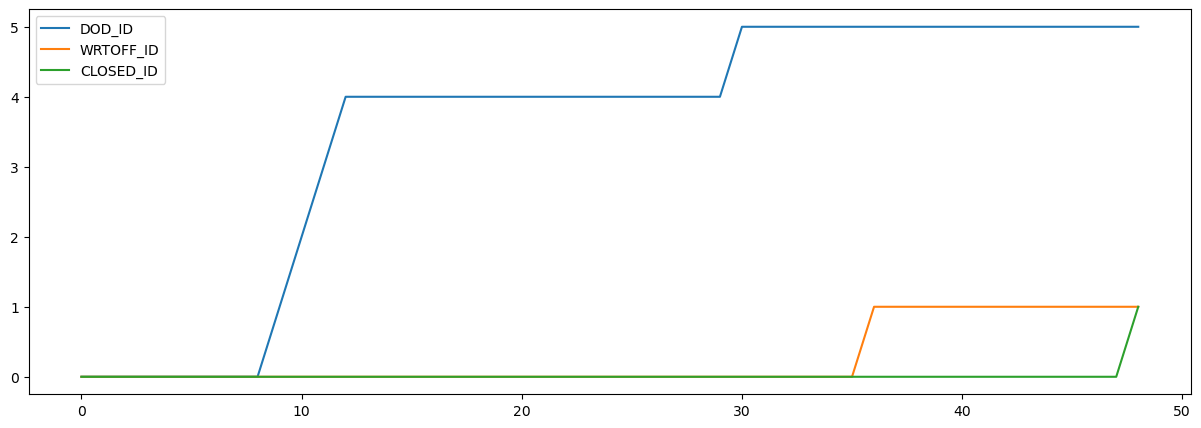

In [554]:
ix = LI['CNTR_ID']==7
plt.figure(figsize=[15,5])
plt.plot(LI[ix].set_index('MOB')[['DOD_ID', 'WRTOFF_ID', 'CLOSED_ID']])
plt.legend(['DOD_ID', 'WRTOFF_ID', 'CLOSED_ID'])
plt.show()

In [555]:
DMC = DWH.DMContract
print(DMC.shape)
DMC.head(20)

(120000, 13)


,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE
0,1,1,0,1,100000,24,0.12,TR01,-1.903522,-1.072969,0,0,3
1,2,1,0,1,100000,24,0.12,TR01,-2.132184,-2.301539,0,0,5
2,3,1,0,1,100000,24,0.12,TR01,-2.287893,-2.060141,0,0,11
3,4,1,0,1,100000,24,0.12,TR01,-1.759613,-1.099891,0,0,15
4,5,1,1,1,100000,24,0.12,TR01,-2.474520,-0.683728,1,0,25
5,6,1,0,1,100000,24,0.12,TR01,-1.518823,-0.687173,1,0,32
6,7,1,1,1,100000,24,0.12,TR01,-1.501934,0.234416,1,0,37
7,8,1,0,1,100000,24,0.12,TR01,-2.044560,-0.747158,1,0,42
8,9,1,1,1,100000,24,0.12,TR01,-1.950114,-0.352250,1,0,51
9,10,1,0,1,100000,24,0.12,TR01,-2.202970,-1.142518,0,0,52


In [556]:
DMC.tail(20)

,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE
119980,119981,120,0,0,50000,36,0.18,TR02,-1.562975,-0.375959,1,0,735540
119981,119982,120,0,0,50000,36,0.18,TR02,-2.082776,-1.450211,0,0,735568
119982,119983,120,0,0,50000,36,0.18,TR02,-2.873195,-2.201858,0,0,735578
119983,119984,120,0,0,50000,36,0.18,TR02,-1.947953,0.371549,1,0,735581
119984,119985,120,0,0,50000,36,0.18,TR02,-1.943294,-1.116811,0,0,735583
119985,119986,120,0,0,50000,36,0.18,TR02,-4.441511,-2.382998,0,0,735591
119986,119987,120,0,0,50000,36,0.18,TR02,-1.667115,-0.489512,1,0,735592
119987,119988,120,0,0,50000,36,0.18,TR02,-1.637461,-1.158276,0,0,735595
119988,119989,120,0,0,50000,36,0.18,TR02,-1.604258,-0.858120,0,0,735600
119989,119990,120,0,0,50000,36,0.18,TR02,-1.671737,-1.526741,0,0,735601


<Axes: xlabel='CNTR_ID'>

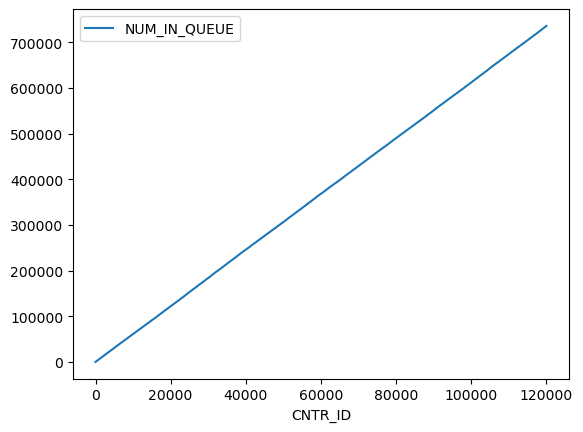

In [557]:
DMC.set_index('CNTR_ID')[['NUM_IN_QUEUE']].plot()

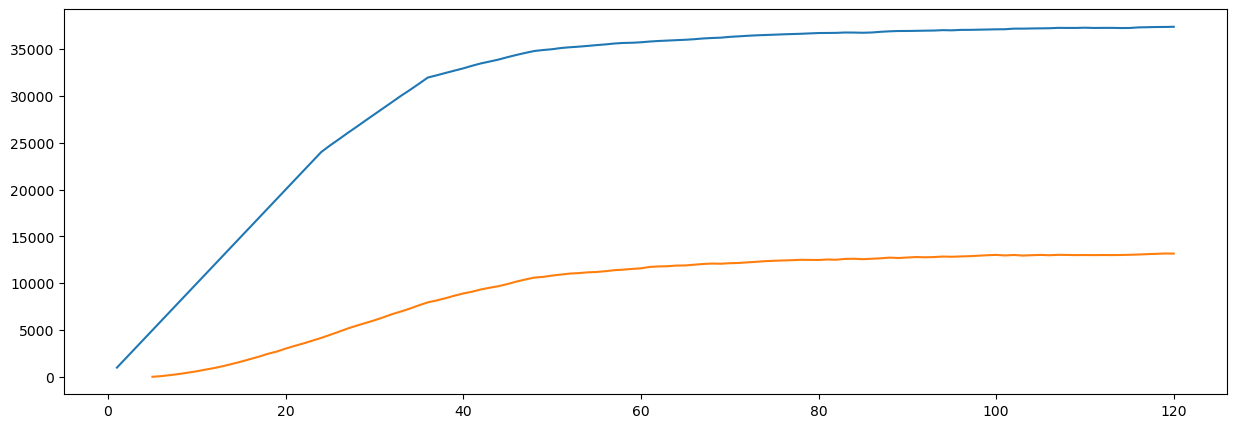

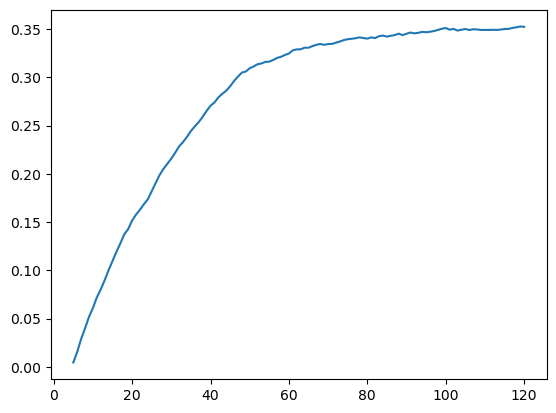

In [558]:
ix = ((LI['WRTOFF_ID'] == 0)&
      (LI['CLOSED_ID'] == 0)
     )
ix_bad = LI['BADFLAG'] == 1

T = LI[ix].groupby('SD')[['CNTR_ID']].count()
B = LI[ix&ix_bad].groupby('SD')[['CNTR_ID']].count()


plt.figure(figsize=[15,5])
plt.plot(T)
plt.plot(B)
plt.show()

plt.plot(B/T)
plt.show()



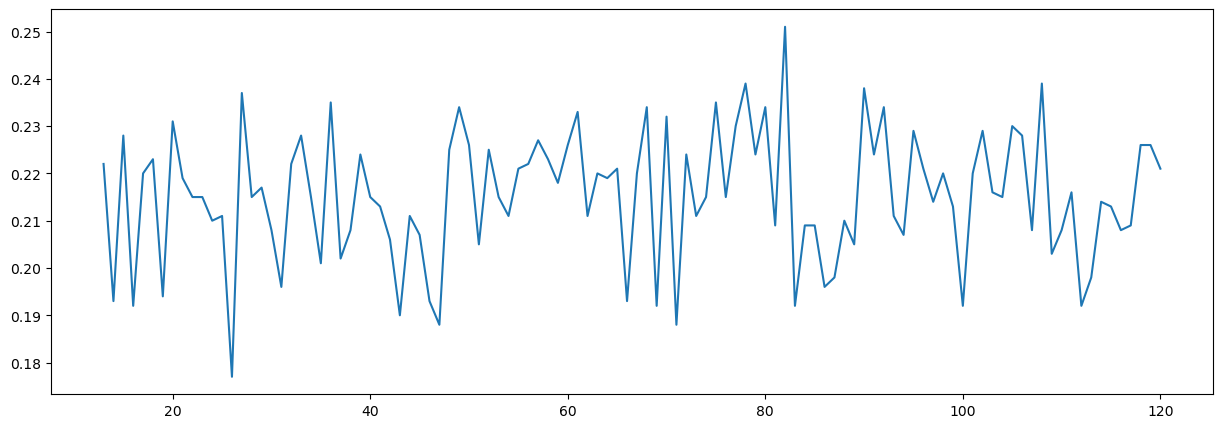

In [560]:
ix = LI['MOB'] == 12

T = LI[ix].groupby('SD')[['BADFLAG']].agg(['mean'])

plt.figure(figsize=[15,5])
plt.plot(T)
plt.show()